In [1]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu
from IPython.display import Latex

import argparse, math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

In [2]:
df_data=pd.read_csv("../DATA/misc/df_binned.csv")
df_info=pd.read_csv("../DATA/misc/df_info.csv")

In [3]:
# add to common utils 
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
display_side_by_side(df_data, df_info)

,Unnamed: 0,index,bincenters,ymean,xerr,yerr
0,0,1,0.152301,0.021406,0.145026,0.052528
1,1,2,0.442353,0.099150,0.145026,0.048644
2,2,3,0.732404,0.091675,0.145026,0.044906
3,3,4,1.022456,0.146910,0.145026,0.041231
4,4,5,1.312507,0.146313,0.145026,0.038267
5,5,6,1.602559,0.196660,0.145026,0.036514
6,6,7,1.892610,0.146808,0.145026,0.035389
7,7,8,2.182661,-0.001507,0.145026,0.034855
8,8,9,2.472713,-0.012411,0.145026,0.035705
9,9,10,2.762764,-0.069989,0.145026,0.037371


In [5]:
x=df_data['bincenters']
y=df_data['ymean']
x_err=df_data['xerr']
y_err=df_data['yerr']

#### Define $y(t) = A\sin(bt)+c$

In [6]:
def sin_unblinded(t, A, b, c):
    return A * np.sin(b * t)+c

#function, X, Y, [starting par]
# Levenberg-Marquardt algorithm as implemented in MINPACK
par, pcov = optimize.curve_fit(sin_unblinded, x, y, sigma=y_err, p0=[0.22, 1.5, -0.1], absolute_sigma=False, method='lm')

par_e = np.sqrt(np.diag(pcov))

print("Params:", par)
print("Errors:", par_e)
chi2_ndf, chi2, ndf=cu.chi2_ndf(x, y, y_err, sin_unblinded, par)
Latex( r"Fit $\frac{\chi^2}{\rm{DoF}}$="+str(round(chi2_ndf,2)) )

Params: [0.13913029 1.33542622 0.01909855]
Errors: [0.01581103 0.05614747 0.01270872]


<IPython.core.display.Latex object>

,Unnamed: 0,edm_setting,data_type,Q_cut,time_cut,p_cut,x_label,y_label,N
0,0,$d_{\mu} = 5.4\times10^{-18} \ e\cdot{\mathrm{cm}}$,VertexExt,AllStationsNoTQ,t>0 $\mathrm{\mu}$s,1800<p<3600 MeV,$t^{mod}_{g-2} \ \mathrm{[\mu}$s],$\langle\theta_y\rangle$ [mrad],1146916


  $\frac{\chi^2}{DoF}$=1.10

 A=+0.14(2) mrad
b=+1.34(6) MHz
c=+0.02(1) mrad



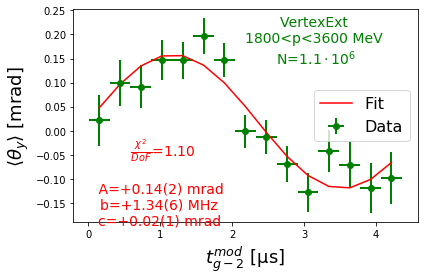

In [7]:
display_side_by_side(df_info) 
fig, ax = plt.subplots()
ax.errorbar(x,y,xerr=x_err, yerr=y_err, linewidth=0, elinewidth=2, color="green", marker="o", label="Data")
ax.plot(x, sin_unblinded(x, par[0], par[1], par[2]), color="red", label='Fit')
ax.legend(loc='best')
ax.set_ylabel(df_info['y_label'][0], fontsize=16)
ax.set_xlabel(df_info['x_label'][0], fontsize=16)

# deal with fitter parameters
parNames=[" A", "b", "c"]
units=["mrad", "MHz", "mrad"]
prec=2
#form complex legends 
legend1_chi2=cu.legend1_fit(chi2_ndf)
legned1_par=""
legned1_par=cu.legend_par(legned1_par,  parNames, par, par_e, units)
legend1=legend1_chi2+"\n"+legned1_par
print(legend1)
legend2=df_info['data_type'][0]+"\n"+df_info["p_cut"][0]+"\n N="+cu.sci_notation(df_info['N'][0])

#place on the plot and save 
y1,y2,x1,x2=0.15,0.85,0.25,0.70
cu.textL(ax, x1, y1, legend1, font_size=14, color="red")    
cu.textL(ax, x2, y2, legend2, font_size=14)
ax.legend(loc='center right', fontsize=16)
ax.set_ylabel(df_info['y_label'][0], fontsize=18)
ax.set_xlabel(df_info['x_label'][0], fontsize=18)
plt.tight_layout() 

plt.savefig("../fig/testFit.png", dpi=300)

# Now perfrom a 4-parameter fit in simulation with the constants phase of 6.240(8) rad 
$$\theta(t) = A_{B_z}\cos(\omega t + \phi) + A_{\mathrm{EDM}}\sin(\omega t + \phi) + c$$
where  
[0] $A_{\mathrm{B_z}}$ is the $B_z$ amplitude   
[1] $A_{\mathrm{EDM}}$ is the EDM amplitude  
[2] $c$ is the offset in the central angle  
[3] $\omega$ is the anomalous precision frequency  (unblinded, for now)

In [15]:
phi = 6.240

def thetaY_unblinded_phase(t, *pars, phi=phi):
    A_bz  = pars[0]      
    A_edm = pars[1]    
    c     = pars[2]    
    omega = pars[3]
    
    return A_bz * np.cos(omega * t + phi) + A_edm * np.sin(omega * t + phi) + c

#function, X, Y, [starting par]
# Levenberg-Marquardt algorithm as implemented in MINPACK
par, pcov = optimize.curve_fit(thetaY_blinded, x, y, sigma=y_err, p0=[0.0, 0.17, 0.0, 1.0], absolute_sigma=False, method='lm')

par_e = np.sqrt(np.diag(pcov))

print("Params:", par)
print("Errors:", par_e)
chi2_ndf, chi2, ndf=cu.chi2_ndf(x, y, y_err, thetaY_blinded, par)
Latex( r"Fit $\frac{\chi^2}{\rm{DoF}}$="+str(round(chi2_ndf,2)) )

Params: [-0.02105066  0.13952303  0.02010779  1.41406212]
Errors: [0.03565141 0.01646812 0.01252943 0.11202457]


<IPython.core.display.Latex object>

  $\frac{\chi^2}{DoF}$=1.15

$ A_{B_z}$=-0.02(4) mrad
$ A_{\rm{EDM}}$=+0.14(2) mrad
c=+0.02(1) mrad
$\omega$=+1.41(11) MhZ



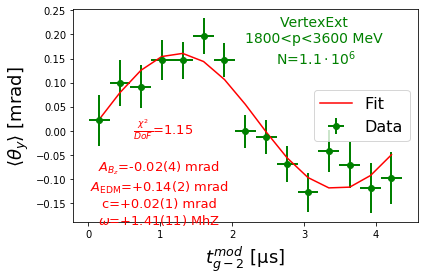

In [14]:
fig, ax = plt.subplots()
ax.errorbar(x,y,xerr=x_err, yerr=y_err, linewidth=0, elinewidth=2, color="green", marker="o", label="Data")
ax.plot(x, thetaY_blinded(x, *par), color="red", label='Fit')
ax.legend(loc='best')
ax.set_ylabel(df_info['y_label'][0], fontsize=16)
ax.set_xlabel(df_info['x_label'][0], fontsize=16)

# deal with fitter parameters
parNames=[r"$ A_{B_z}$", r"$ A_{\rm{EDM}}$", "c", r"$\omega$"]
units=["mrad", "mrad", "mrad", "MhZ"]
prec=2
#form complex legends 
legend1_chi2=cu.legend1_fit(chi2_ndf)
legned1_par=""
legned1_par=cu.legend_par(legned1_par,  parNames, par, par_e, units)
legend1=legend1_chi2+"\n"+legned1_par
print(legend1)
legend2=df_info['data_type'][0]+"\n"+df_info["p_cut"][0]+"\n N="+cu.sci_notation(df_info['N'][0])

#place on the plot and save 
y1,y2,x1,x2=0.2,0.85,0.25,0.70
cu.textL(ax, x1, y1, legend1, font_size=13, color="red")    
cu.textL(ax, x2, y2, legend2, font_size=14)
ax.legend(loc='center right', fontsize=16)
ax.set_ylabel(df_info['y_label'][0], fontsize=18)
ax.set_xlabel(df_info['x_label'][0], fontsize=18)
plt.tight_layout() 

plt.savefig("../fig/testFit.png", dpi=300)